In [4]:
import matplotlib.pyplot as plt
import cnn as cnn
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import pandas as pd
from PIL import Image
import numpy as np
import torch
import imageio

In [5]:
df = pd.read_csv(r'data\A_Z Handwritten Data.csv').astype('float32')

In [6]:
x = df.drop('0', axis = 1)
y = df['0']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)
print('Train Data Shape:', y_train.shape)
print('Test Data Shape:', y_test.shape)

Train Data Shape: (297960, 28, 28)
Test Data Shape: (74490, 28, 28)
Train Data Shape: (297960,)
Test Data Shape: (74490,)


In [9]:
word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

In [14]:
# During dataset creation
X_train = []
for xi, yi in zip(x_train, y_train):
    x_new = torch.tensor(xi.reshape(1, 28, 28), dtype=torch.float32)  # add channel dimension
    y_new = torch.tensor(yi, dtype=torch.long)
    X_train.append((x_new, y_new))

X_test = []
for xi, yi in zip(x_test, y_test):
    x_new = torch.tensor(xi.reshape(1, 28, 28), dtype=torch.float32)
    y_new = torch.tensor(yi, dtype=torch.long)
    X_test.append((x_new, y_new))

In [20]:
model = cnn.CNN((28,28), [(3,1,1,32),(3,1,1,32),(3,1,1,64),(3,1,1,64)], [0,2,0,2], [26], 1)

In [21]:
model

CNN(
  (conv_layers): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (pool_layers): ModuleList(
    (0): MaxPool2d(kernel_size=0, stride=0, padding=0, dilation=1, ceil_mode=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): MaxPool2d(kernel_size=0, stride=0, padding=0, dilation=1, ceil_mode=False)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): ModuleList(
    (0): Linear(in_features=3136, out_features=26, bias=True)
  )
)

In [22]:
model.train(X_train, 3, 100, 0.01, X_test)

Epoch 0 Test accuracy: 0.9422204494476318
Epoch 1 Test accuracy: 0.9524365663528442
Epoch 2 Test accuracy: 0.9449053406715393


In [52]:
image = Image.open('images\B2.png')
image = image.resize((28, 28))
image_array = np.array(image)

if image_array.ndim == 3: 
    image_array = image_array.mean(axis=2)
image_array = image_array

x = torch.tensor(image_array, dtype=torch.float32)
x = x.unsqueeze(0).unsqueeze(0)
x = 255 - x
x.shape

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\26101742\AppData\Local\Temp\ipykernel_11044\3962949984.py:1: SyntaxWarning: invalid escape sequence '\B'
  image = Image.open('images\B2.png')


torch.Size([1, 1, 28, 28])

In [57]:
output = torch.argmax(model(x), dim=1)
letter = word_dict[output.item()]
print(letter)

B


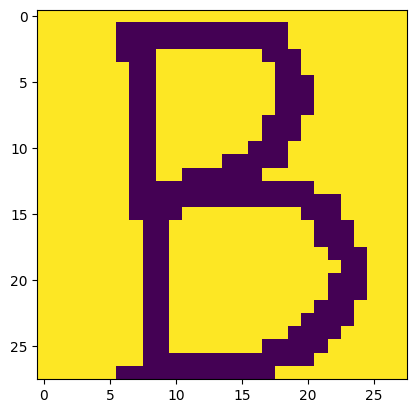

In [58]:
plt.imshow(image_array)

In [60]:
torch.save(model.state_dict(), "cnn_model.pth")